# Importing Libraries

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [16]:
hData = pd.read_csv("C:\\Users\\aloky\\OneDrive\\Desktop\\Sentiment Analysis\\god knows\\Processed\\waiting_area_processed.csv")

In [17]:
hData.head()

Unnamed: 0                                             Tweets Sentiment
0           0  indigo6e airline pain waiting 30 min baggage d...   Neutral
1           1  much bangalore airport t2 wonderful inside out...  Positive
2           2  4060mins waiting uberola bangalore airport 12 ...  Positive
3           3  looks like waiting area first floor bangalore ...  Positive
4           4  matter fancy airport inaugurated problem remai...   Neutral

In [18]:
hData = hData.drop(hData.columns[hData.columns.str.contains('Unnamed', case=False)], axis=1)

In [19]:
hData.head()

Tweets Sentiment
0  indigo6e airline pain waiting 30 min baggage d...   Neutral
1  much bangalore airport t2 wonderful inside out...  Positive
2  4060mins waiting uberola bangalore airport 12 ...  Positive
3  looks like waiting area first floor bangalore ...  Positive
4  matter fancy airport inaugurated problem remai...   Neutral

In [20]:
# Pie-Chart
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp={'linewidth':2, 'edgecolor':"black"}
tags = hData['Sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', shadow=True, colors=colors, autopct='%1.1f%%', wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of Sentiments")

Text(0.5, 1.0, 'Distribution of Sentiments')

## Analysis on the Negetive Tweets

In [21]:
# Collecting all the Negetive Tweets from the dataset
negetive_tweets = hData[hData.Sentiment == 'Negetive']

negetive_reviwes = negetive_tweets['Tweets'].tolist()

In [22]:
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable","already", "amp", "guys", "pls", 'im', "us", "another",
                     "next", "god", "hope", "bless", "value", "dearest", "get" , "im", "mins", "till", "still", "already"]

In [24]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
new_stop_words = [frozenset(stop_words)]
stop_words = new_stop_words + custom_stop_words

In [25]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = new_stop_words)
x = vectorizer.fit_transform(negetive_reviwes)

In [26]:
# Lda model
num_topics = 10
lda = LatentDirichletAllocation(n_components = num_topics, random_state=40)
lda.fit(x)

LatentDirichletAllocation(random_state=40)

In [27]:
num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [28]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: hours,experience,pathetic,since,indigo6e,past,really,wrong,amp,area
Topic 2: waiting,area,hours,service,domestic,pathetic,flight,indigo6e,30,worst
Topic 3: flight,waiting,delayed,today,pune,travelling,customer,line,didnt,worst
Topic 4: indigo6e,get,staff,waiting,next,fight,20,mins,us,area
Topic 5: time,waiting,hour,domestic,serious,luggage,airline,30,guys,area
Topic 6: hours,pathetic,train,im,midnight,checkin,fight,delayed,waiting,flight
Topic 7: one,waiting,also,area,hours,service,domestic,pathetic,flight,indigo6e
Topic 8: akasaair,money,people,waiting,flight,one,taking,amp,us,mins
Topic 9: flight,back,mumbai,hours,help,get,delayed,waiting,sitting,area
Topic 10: flight,waiting,indigo6e,service,worst,till,still,sitting,time,already


In [29]:
# WordCloud 
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud= WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negetive Tweets (Waiting Area)', fontsize=19)
plt.show()

# Observation for negative tweets:
## 1) Flight Delays and Waiting Time:
#### •	Passengers have complained about the prolonged waiting times lasting for hours, both on the ground and in the air.
#### •	There were many complaints that talked about flights being delayed without proper announcements or updates.
## 2) Customer Service and Communication:
#### •	Numerous concerns were expressed regarding poor customer service from various airlines which included staff not being very responsive to the passengers needs.
#### •	There was a lack of communication from the airlines about flight delays or any changes that led to passenger dissatisfaction.
## 3) Inadequate assistance during emergencies and wheelchair services:
#### •	Especially for senior citizens. They faced a lot of difficulties with wheelchair services which included prolonged waits and inadequate assistance.
#### •	Inadequate assistance during medical emergencies were reported,which was about delays in providing necessary support and guidance. 
#### •	There were no medical stores available in the Airport .
## 4) Terminal Management and Infrastructure:
#### •	Complaints were basically raised about the mismanagement at the terminal which included issues with the boarding, check-in counters and pickup points.
#### •	Some passengers even criticised the airport's infrastructure and space management which are problems like overcrowding, inadequate facilities, and poor planning.
## 5) Missed Flights and Financial Losses:
#### •	Passengers also reported many incidents of missed flights which resulted in financial losses. Some stated that they were not appropriately informed about the delays which led to their missed flights


## Analysis on the Positive Tweets

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable", "much", "waiting", "time", "need", "also", "first", "since",
                     "always", "please", "last", "even", "near", "entire", "lot", "many", "used", "one", "entire", "though",
                     "amp", "us", "guys", "lol", "ps", "knows", "long", "inside", "many"]
stop_words = stop_words + custom_stop_words
new_stop_words = [frozenset(stop_words)]

In [31]:
# Collecting all the Positive Tweets from the dataset
positive_tweets = hData[hData.Sentiment == 'Positive']
positive_reviews = positive_tweets['Tweets'].tolist()

In [32]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = stop_words)
x = vectorizer.fit_transform(positive_reviews)

In [33]:
# Lda model
num_topics = 10
lda = LatentDirichletAllocation(n_components = num_topics, random_state=1)
lda.fit(x)

LatentDirichletAllocation(random_state=1)

In [34]:
num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [35]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: wifi,road,t2,big,bag,service,baggage,months,city,area
Topic 2: food,good,great,lounge,today,security,area,well,ground,service
Topic 3: area,floor,security,better,check,like,lounge,today,hospitality,flight
Topic 4: city,fuel,check,respected,offers,road,beyond,passengers,area,hospitality
Topic 5: passengers,white,great,beyond,flight,bag,ground,big,better,hundreds
Topic 6: flight,30,baggage,india,service,air,well,hospitality,good,area
Topic 7: area,seat,hundreds,hi,air,thanks,respected,dont,hospitality,today
Topic 8: good,dont,today,blrairport,like,took,india,hi,ground,hospitality
Topic 9: hospitality,best,offers,road,area,today,flight,months,service,blrairport
Topic 10: good,lounge,months,blrairport,really,thanks,flight,area,hospitality,today


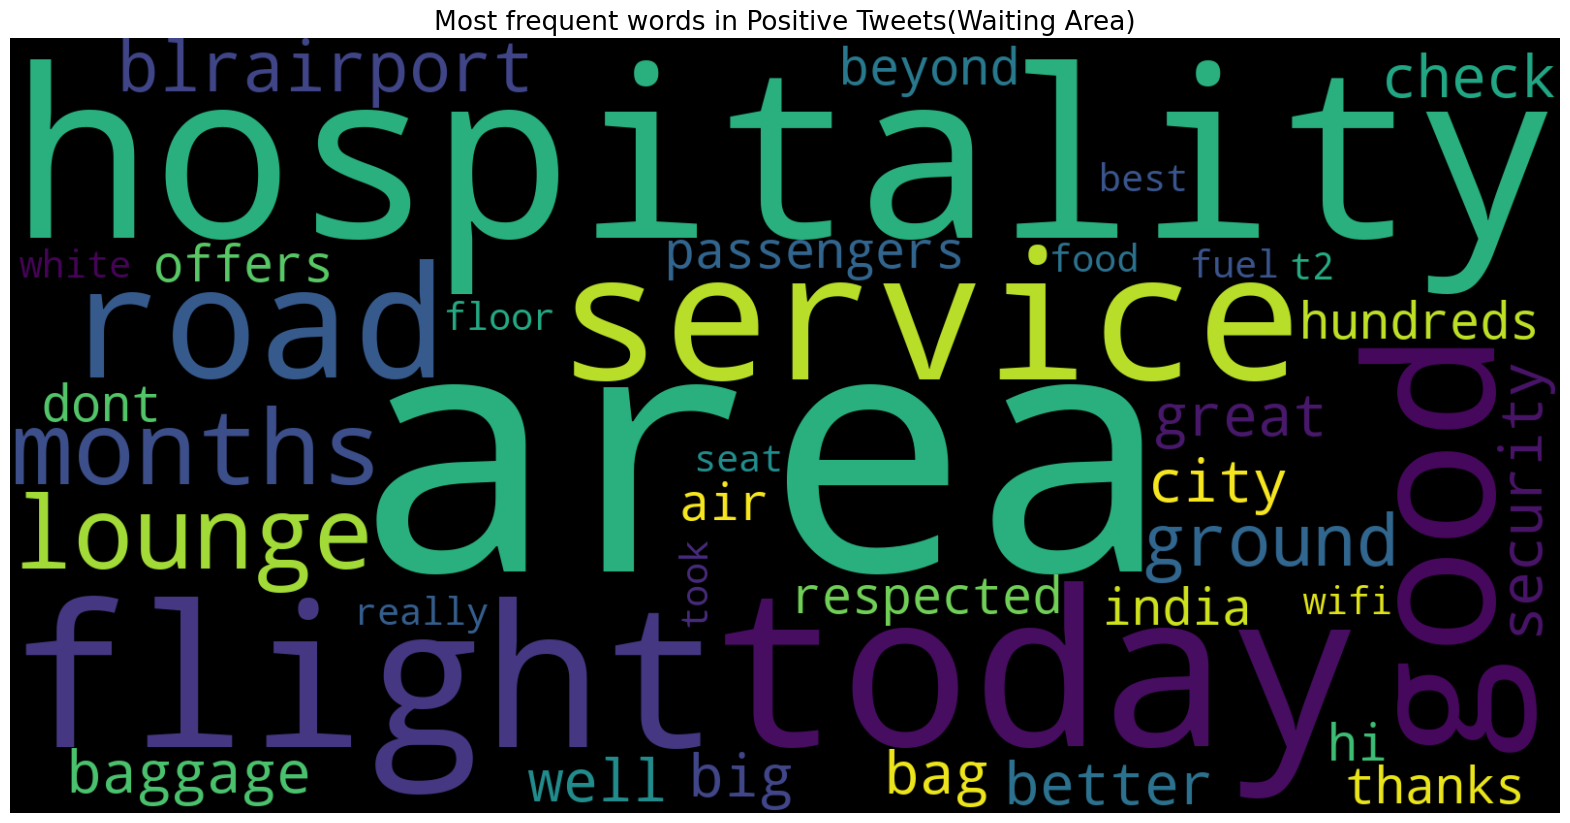

In [36]:
# WordCloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud= WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets(Waiting Area)', fontsize=19)
plt.show()

# Observation for positive tweets:
## 1) Infrastructure Improvements: 
#### •	Since the waiting area on the first floor of Bangalore Airport's Terminal 1 has been revamped has led to the improved passenger experiences.
#### •	 specific staff members at the airport provided efficient and friendly assistance enhancing the overall travel experience for passengers.
## 2) Improved Security Measures:
#### •	the improved security measures at Bangalore Airport which includes the opening of additional windows at the immigration area and faster processing times.
## 3) Convenient Amenities and Facilities:
#### •	Many positive experiences were given for the availability of facilities such as lounges, Wi-Fi services and well-maintained waiting areas.
## 4) Convenient location and accessibility:
#### •	The convenient location of the Red Key Airport Hotel on Kempegowda International Airport Road was mentioned which offered budget-friendly accommodation and welcoming hospitality for guests.
## 5) Efficient Service and Support:
#### •	They also highlighted where the ground staff of different airlines including IndiGo, were praised for their proactive and affectionate approachs making the passengers feel quite welcomed and valued.
